In [8]:
# 공공데이터 포털 에서 "서울특별시 동대문구_상권정보_종합정보"
# 압축을 풀고 csv파일을 복사해서 파일이름을 train2.csv로 변경

In [9]:
# pandas matplotlib seaborn 라이브러리 로드
# 한글 폰트 인식  H2GTRM.TTF
# csv파일을 읽어서 변수(train)에 저장

In [10]:
# to chatgpt

# Windows 환경에서 VSCode와 Python을 쓰는데, 
# matplotlib, seaborn, 등 주요 시각화 라이브러리에
# 한글 폰트 'H2GTRM.TTF'를 한 번에 간단하게 적용하는 깔끔한 방법, 
# 특히 matplotlib rcParams를 활용한 방법까지 알려줘.


In [ ]:
%pip install pandas matplotlib seaborn

In [12]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 1) 폰트 경로 지정 (윈도우 기본 폰트 폴더 기준)
font_path = r"C:/Windows/Fonts/H2GTRM.TTF"

# 2) 폰트 프로퍼티 생성
font_prop = fm.FontProperties(fname=font_path)

# 3) 폰트 이름 가져오기
font_name = font_prop.get_name()

# 4) matplotlib 전역 설정 (rcParams)
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지


In [13]:
# 데이터 읽고 head()  로 출력해보기

In [16]:
import pandas as pd
train = pd.read_csv('train2.csv',encoding='cp949')
train.head(1)

,아이디,상권명,시도명,시군구명,읍면동명,면적,업체수,위도,경도,데이터기준일자,이미지명
0,M01,회기시장,서울특별시,서울특별시 동대문구,회기동,341050,90,37.591097,127.055516,2022-12-12,M01_0001_회기시장


In [17]:
# 데이터중에 필요없는 항목은 제거한다
train2= train.drop(columns=['아이디','시도명','시군구명','데이터기준일자','이미지명'])
train2.head(1)

,상권명,읍면동명,면적,업체수,위도,경도
0,회기시장,회기동,341050,90,37.591097,127.055516


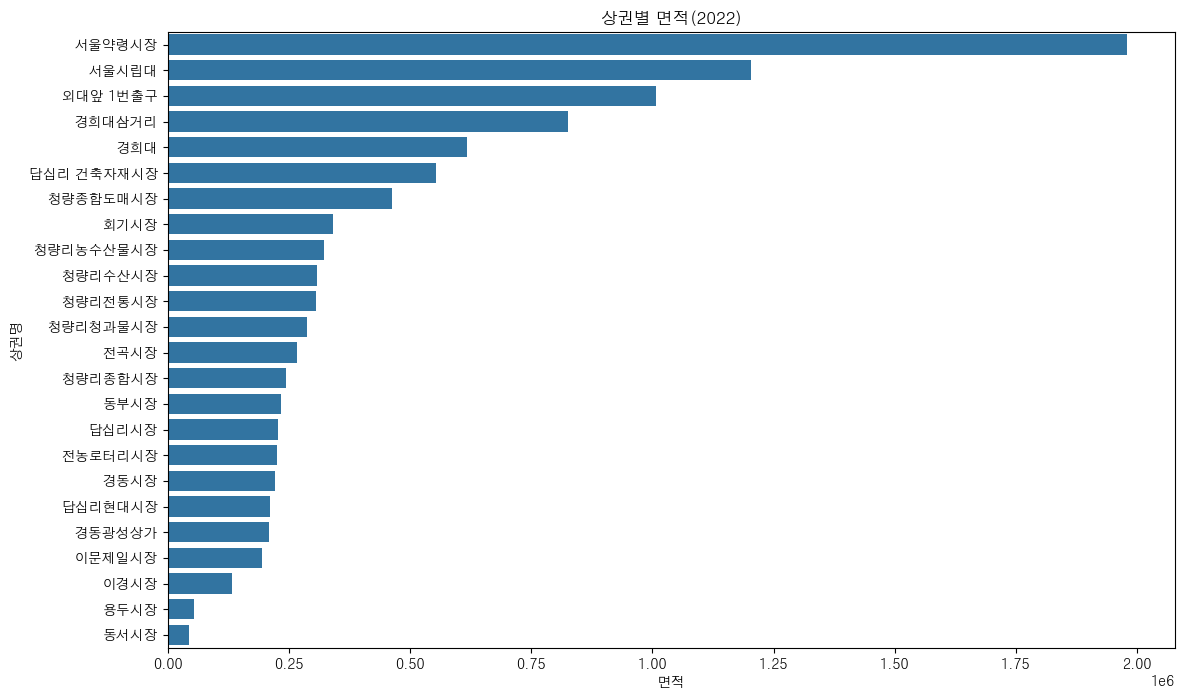

In [31]:
# 상권별 면적의 크기
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(13,8))
df_sorted = train2.sort_values(by='면적',ascending=False)
sns.barplot(df_sorted,y='상권명',x='면적')
# plt.xticks(rotation = 45)
plt.title('상권별 면적(2022)')
plt.show()

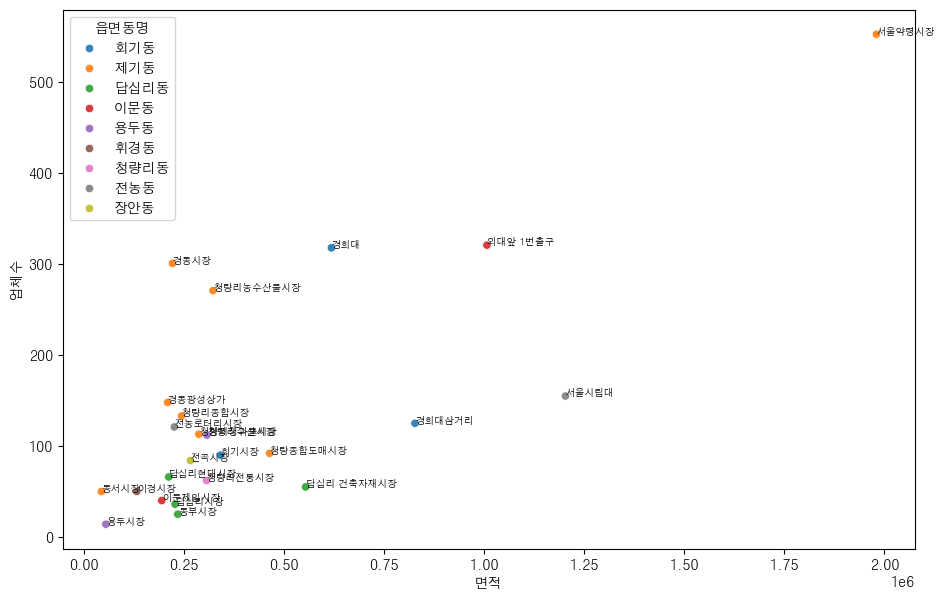

In [42]:
# 면적과 업체수 관계 파악(상관관계분석)
# sns.scatterplot
plt.figure(figsize=(11,7))
sns.scatterplot(train2, x='면적', y='업체수', hue='읍면동명',alpha=0.9)
# 각 점에 상권명 라벨
for i in range(train2.shape[0]):
    plt.text(x=train2['면적'][i]+500, y=train2['업체수'][i],s = train2['상권명'][i],
             fontdict={'color':'black', 'size':7})             
plt.show()

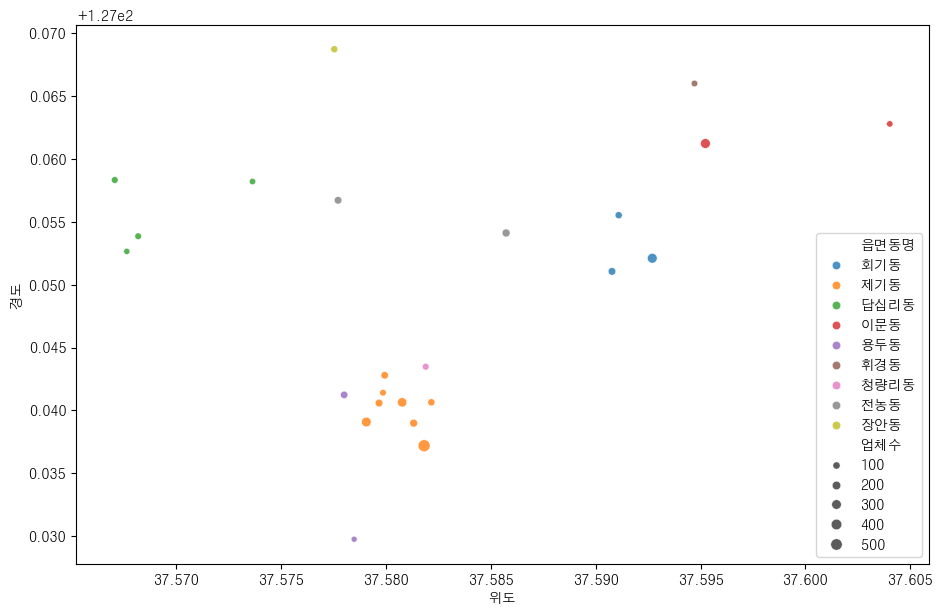

In [45]:
plt.figure(figsize=(11,7))
sns.scatterplot(train2, x='위도', y='경도', size='업체수',  hue='읍면동명',alpha=0.8)
plt.show()

In [ ]:
# 지도에 표시
%pip install folium

In [54]:
import folium
map_center = [train2['위도'].mean(), train2['경도'].mean()]
m = folium.Map(location=map_center,zoom_start=11)
for idx,row in  train2.iterrows():
    folium.CircleMarker(
        location = [row['위도'],row['경도']],
        radius=row['업체수']/10,
        fill = True,
        popup=row['상권명']
    ).add_to(m)
m.save('commercial_distircts_map.html')